In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta

In [3]:
serie_demanda = pd.read_csv('data/data_serie_demanda_EU27_GWh.csv', index_col=0, parse_dates=True)
# establecer frecuencia diaria
serie_demanda = serie_demanda.asfreq('D')
serie_demanda.index

serie_demanda_00_09 = serie_demanda['2000':'2009'].copy()
serie_demanda_00_09.head()

,EU27
Date,
2000-01-01,6806.8927
2000-01-02,6722.4017
2000-01-03,8148.5081
2000-01-04,8286.5019
2000-01-05,8197.9557


In [4]:
serie_oferta = pd.read_csv('data\data_serie_oferta_EU27_GWh.csv', index_col=0, parse_dates=True)
# establecer frecuencia diaria
serie_oferta = serie_oferta.asfreq('D')
serie_oferta.index

serie_oferta_00_09 = serie_oferta['2000':'2009'].copy()
serie_oferta_00_09.head()

,EU27
Date,
2000-01-01,1422.795412
2000-01-02,1545.156958
2000-01-03,2139.547860
2000-01-04,2214.760099
2000-01-05,2022.462280


## Regresión polinómica

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [42]:
def evaluar_modelo(nombre_modelo, y_real, y_pred, dict_resultados):
    mse = mean_squared_error(y_real, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_real, y_pred)
    mape = np.mean(np.abs((y_real - y_pred) / y_real)) * 100
    r2 = r2_score(y_real, y_pred)
    max_error_val = np.max(np.abs(y_real - y_pred))
    
    # guardar resultados en el diccionario
    dict_resultados[nombre_modelo] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'R2': r2,
        'Max Error': max_error_val
    }
    
    return dict_resultados

### Polinomio + Fourier (trigonométrico)
para capturar la tendencia global y las oscilaciones anuales

In [54]:
# Construir un modelo mixto: polinomio de grado 3 + términos trigonométricos (2 armónicos anuales)

# Crear funciones polinomiales y armónicos de Fourier
def build_mixed_features(t, poly_degree, harmonics=2, period=365):
    features = [t**i for i in range(1, poly_degree + 1)]
    for k in range(1, harmonics + 1):
        features.append(np.sin(2 * np.pi * k * t / period))
        features.append(np.cos(2 * np.pi * k * t / period))
    return np.hstack(features)

def generar_y_graficar_modelo(serie_demanda, GRADO, nombre_modelo):

    # Preparar variables para regresión polinómica
    t = np.arange(len(serie_demanda)).reshape(-1, 1)
    y_true = serie_demanda.values

    # Crear la matriz de características
    t_vals = np.arange(len(serie_demanda)).reshape(-1, 1)
    X_mixed = build_mixed_features(t_vals, poly_degree=GRADO)

    # Ajustar el modelo
    model_mixed = LinearRegression().fit(X_mixed, y_true)
    y_mixed_pred = model_mixed.predict(X_mixed)

    # Crear DataFrame para visualizar
    df_mixed_model = pd.DataFrame({
        'date': serie_demanda.index,
        'demanda_real': y_true,
        'demanda_modelo_mixto': y_mixed_pred
    }).set_index('date')



    # evaluar modelo
    dict_result_1 = evaluar_modelo(
        nombre_modelo,
        df_mixed_model['demanda_real'],
        df_mixed_model['demanda_modelo_mixto'],
        {}
    )

    # Imprimir resultados del modelo mixto
    print(f"Resultados {nombre_modelo}:")
    for key, value in dict_result_1[nombre_modelo].items():
        print(f"{key}: {value:.4f}")


    # Graficar resultado
    plt.figure(figsize=(14, 6))
    plt.plot(df_mixed_model.index, df_mixed_model['demanda_real'], label='Demanda Real', linewidth=1)
    plt.plot(df_mixed_model.index, df_mixed_model['demanda_modelo_mixto'], label='Modelo Polinomio + Fourier', linewidth=2, linestyle='--')
    plt.title("Modelo Mixto: Polinomio + Componentes Trigonométricas")
    plt.xlabel("Fecha")
    plt.ylabel("Demanda (GWh)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()





Resultados Modelo_Polinomio_Fourier_gr5:
MSE: 375424.0052
RMSE: 612.7185
MAE: 518.5279
MAPE: 7.4436
R2: 0.4794
Max Error: 2054.4242


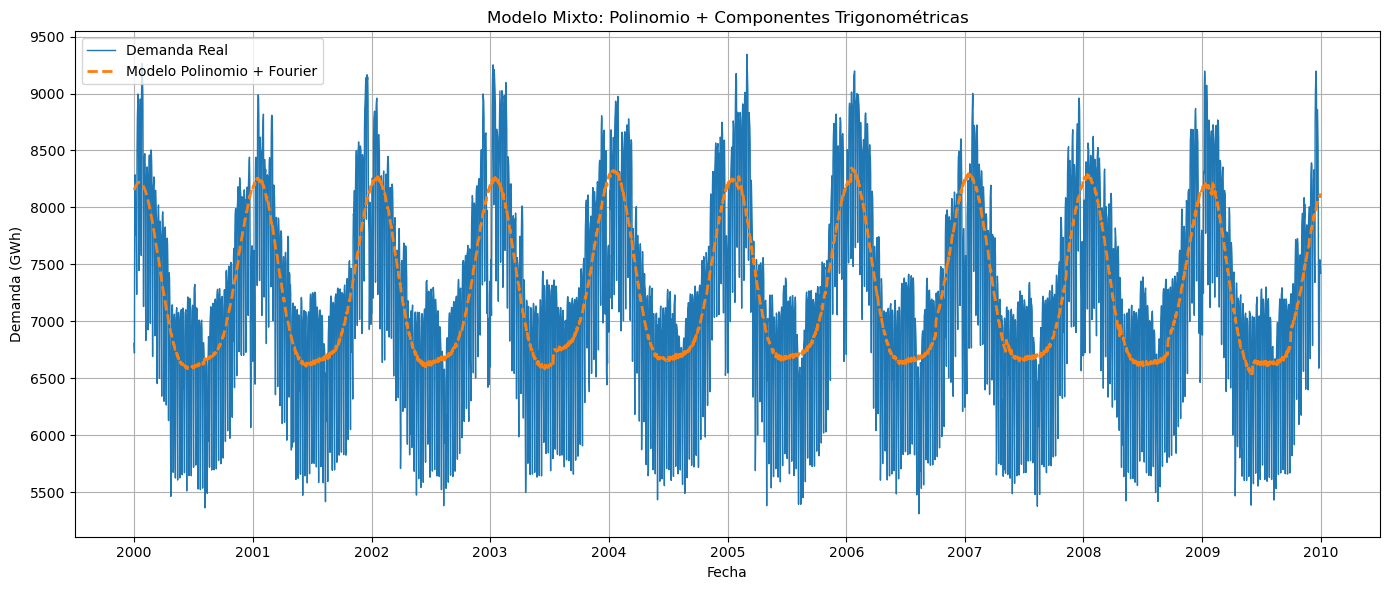

In [55]:
generar_y_graficar_modelo(serie_demanda_00_09, GRADO=5, nombre_modelo='Modelo_Polinomio_Fourier_gr5')

Resultados Modelo_Polinomio_Fourier_gr10:
MSE: 374974.2786
RMSE: 612.3514
MAE: 517.9314
MAPE: 7.4349
R2: 0.4800
Max Error: 2044.5284


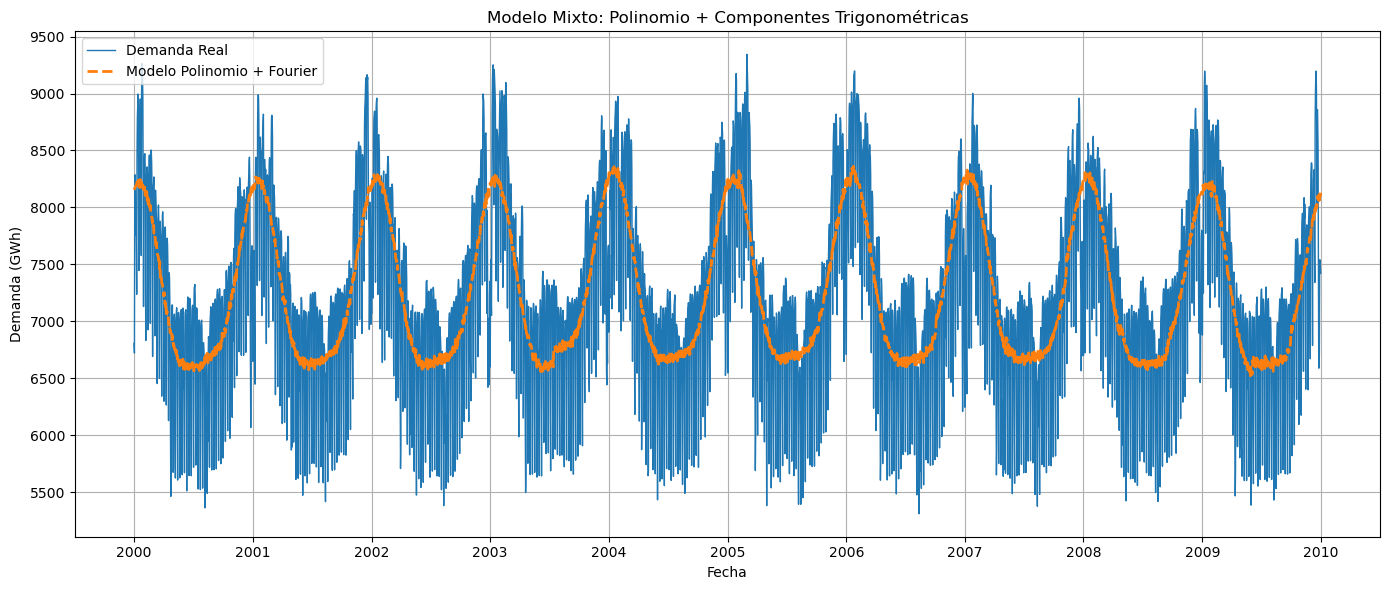

In [56]:
generar_y_graficar_modelo(serie_demanda_00_09, GRADO=10, nombre_modelo='Modelo_Polinomio_Fourier_gr10')

Resultados Modelo_Polinomio_Fourier_gr15:
MSE: 374822.2579
RMSE: 612.2273
MAE: 517.9465
MAPE: 7.4347
R2: 0.4802
Max Error: 2021.2773


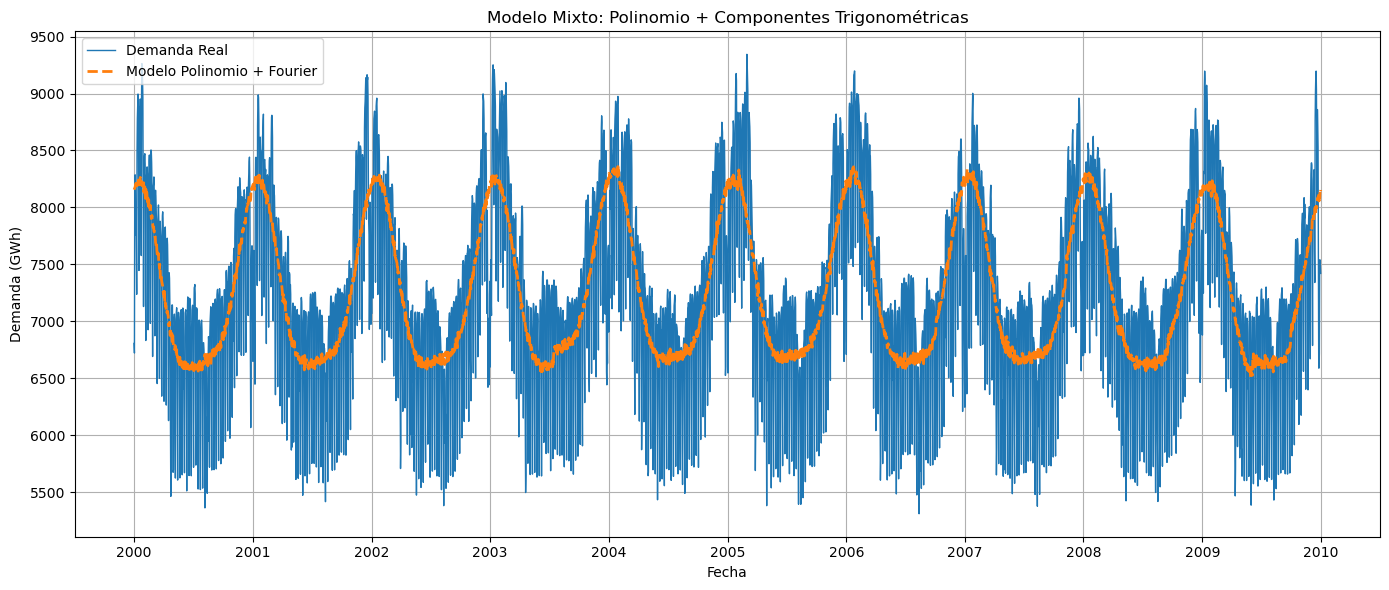

In [57]:
generar_y_graficar_modelo(serie_demanda_00_09, GRADO=15, nombre_modelo='Modelo_Polinomio_Fourier_gr15')

### grado 5

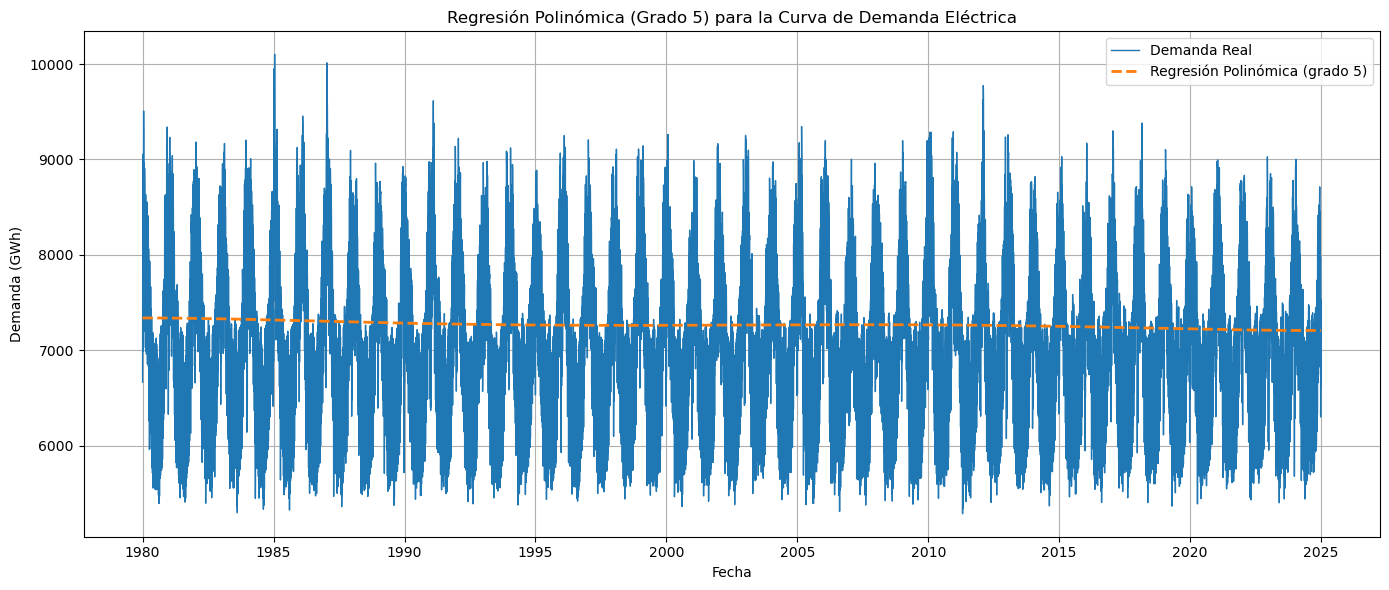

In [ ]:
# Reimportar dependencias necesarias tras reinicio





# Ajustar regresión polinómica de grado 5
poly_features_5 = PolynomialFeatures(degree=5, include_bias=False)
X_poly_5 = poly_features_5.fit_transform(t)

model_poly_5 = LinearRegression().fit(X_poly_5, y_true)
y_poly_pred_5 = model_poly_5.predict(X_poly_5)



# Crear DataFrame para graficar
df_poly_curve = pd.DataFrame({
    'date': serie_demanda.index,
    'demanda_real': y_true,
    'demanda_poly_grado_5': y_poly_pred_5
}).set_index('date')

# Graficar toda la serie con la curva ajustada
plt.figure(figsize=(14, 6))
plt.plot(df_poly_curve.index, df_poly_curve['demanda_real'], label='Demanda Real', linewidth=1)
plt.plot(df_poly_curve.index, df_poly_curve['demanda_poly_grado_5'], label='Regresión Polinómica (grado 5)', linewidth=2, linestyle='--')
plt.title("Regresión Polinómica (Grado 5) para la Curva de Demanda Eléctrica")
plt.xlabel("Fecha")
plt.ylabel("Demanda (GWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Otros

In [9]:
from scipy.optimize import curve_fit

# Definir la función de la forma de Euler solicitada
def euler_sinusoidal(t, k1, k2, k3, C1, C2):
    return np.exp(-k1 * t) * (C1 * np.sin(k2 * t) + C2 * np.cos(k3 * t))

# Usar la serie de demanda de antes, ya cargada y filtrada de 2015 a 2024
t = np.arange(len(serie_demanda)).reshape(-1, 1)
# Preparar el tiempo como array 1D
t_flat = t.flatten()

# Ajustar los parámetros usando la demanda real
params, _ = curve_fit(euler_sinusoidal, t_flat, serie_demanda.values, p0=[0.00001, 0.01, 0.01, 1e7, 1e7])

# Generar predicción con los parámetros ajustados
demanda_pred_euler = euler_sinusoidal(t_flat, *params)

# Crear DataFrame para mostrar resultados
df_demanda_euler = pd.DataFrame({
    'date': serie_demanda.index,
    'demanda_real': serie_demanda.values,
    'demanda_modelo_euler': demanda_pred_euler
}).set_index('date')

df_demanda_euler.head(10)

,demanda_real,demanda_modelo_euler
date,,
1980-01-01,6666.1478,72.711657
1980-01-02,7858.5535,75.985979
1980-01-03,8180.7627,79.253100
1980-01-04,8178.1648,82.513024
1980-01-05,7385.6825,85.765755
1980-01-06,6984.7870,89.011298
1980-01-07,8381.1318,92.249658
1980-01-08,8721.1213,95.480840
1980-01-09,8852.7579,98.704852


In [12]:
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Valores reales y predichos
y_true = df_demanda_euler['demanda_real'].values
y_pred = df_demanda_euler['demanda_modelo_euler'].values

# Redefinir la función objetivo para minimizar: el MSE entre predicción y valores reales
def objective(params, t, y_real):
    k1, k2, k3, C1, C2 = params
    y_pred = np.exp(-k1 * t) * (C1 * np.sin(k2 * t) + C2 * np.cos(k3 * t))
    return mean_squared_error(y_real, y_pred)

# Valores iniciales
initial_params = [0.001, 0.02, 0.02, 1e7, 1e7]

# Límites para evitar inestabilidad numérica
bounds = [
    (1e-6, 1e-2),   # k1
    (0.0001, 0.1),  # k2
    (0.0001, 0.1),  # k3
    (1e6, 1e8),     # C1
    (1e6, 1e8)      # C2
]

# Ejecutar optimización
result = minimize(
    objective,
    initial_params,
    args=(t_flat, y_true),
    bounds=bounds,
    method='L-BFGS-B',
    options={'maxiter': 10000}
)

# Extraer parámetros óptimos y predecir
opt_params = result.x
demanda_pred_opt = np.exp(-opt_params[0] * t_flat) * (
    opt_params[3] * np.sin(opt_params[1] * t_flat) + 
    opt_params[4] * np.cos(opt_params[2] * t_flat)
)

# Crear nuevo DataFrame con resultados mejorados
df_demanda_opt = pd.DataFrame({
    'date': serie_demanda.index,
    'demanda_real': y_true,
    'demanda_modelo_opt': demanda_pred_opt
}).set_index('date')

df_demanda_opt.head(10)

,demanda_real,demanda_modelo_opt
date,,
1980-01-01,6666.1478,1000000.000000
1980-01-02,7858.5535,986070.488221
1980-01-03,8180.7627,962574.279718
1980-01-04,8178.1648,929944.937724
1980-01-05,7385.6825,888698.504343
1980-01-06,6984.7870,839426.714257
1980-01-07,8381.1318,782789.586502
1980-01-08,8721.1213,719507.480658
1980-01-09,8852.7579,650352.707419


In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression

# Construir pipeline: polinomio + regresión lineal
pipeline = Pipeline([
    ('poly', PolynomialFeatures(include_bias=False)),
    ('linreg', LinearRegression())
])

# Definir el espacio de búsqueda de grados polinomiales
param_grid = {
    'poly__degree': list(range(1, 10))  # grados de 1 a 9
}

# Aplicar búsqueda de rejilla con validación cruzada
grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_squared_error', cv=5)
grid_search.fit(t, y_true)

# Obtener el mejor modelo
best_model = grid_search.best_estimator_
best_degree = grid_search.best_params_['poly__degree']
demanda_pred_poly = best_model.predict(t)

# Crear DataFrame para mostrar resultados
df_demanda_poly = pd.DataFrame({
    'date': serie_demanda.index,
    'demanda_real': y_true,
    'demanda_modelo_poly': demanda_pred_poly
}).set_index('date')

df_demanda_poly.head(10)

,demanda_real,demanda_modelo_poly
date,,
1980-01-01,6666.1478,7320.236065
1980-01-02,7858.5535,7320.229689
1980-01-03,8180.7627,7320.223313
1980-01-04,8178.1648,7320.216937
1980-01-05,7385.6825,7320.210561
1980-01-06,6984.7870,7320.204184
1980-01-07,8381.1318,7320.197808
1980-01-08,8721.1213,7320.191432
1980-01-09,8852.7579,7320.185056


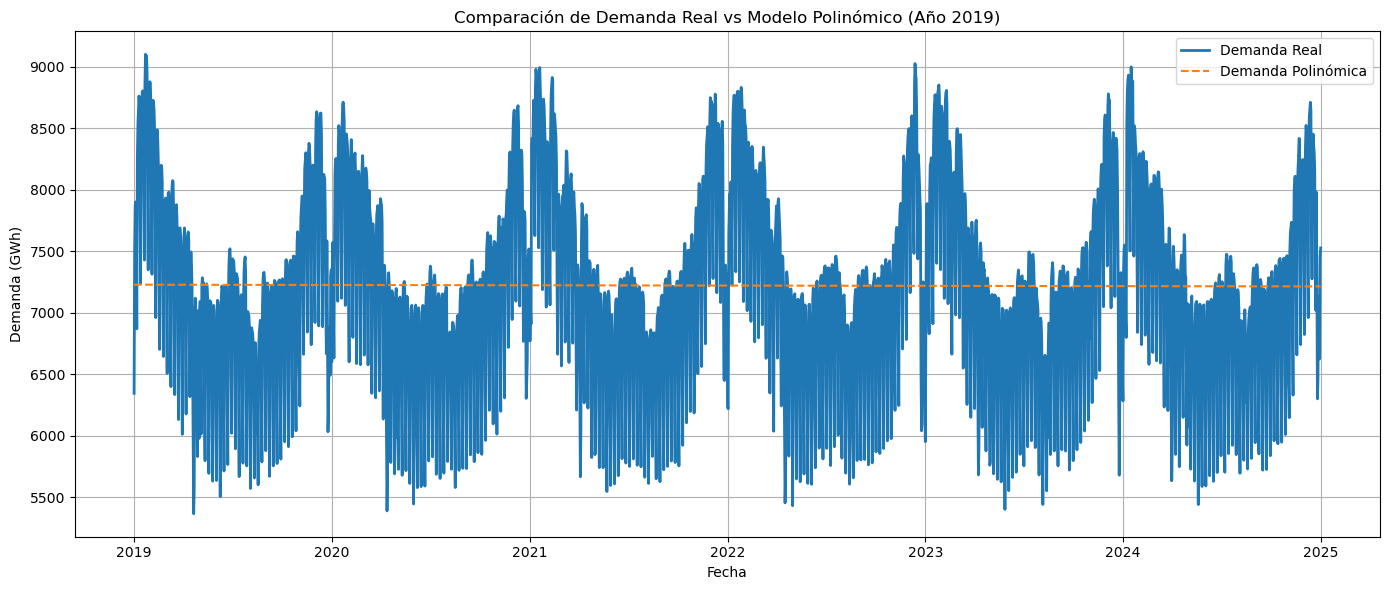

In [17]:
import matplotlib.pyplot as plt

# Reducir número de puntos para graficar (por ejemplo, un año) para legibilidad
subset = df_demanda_poly['2019':'2024']

# Crear gráfica
plt.figure(figsize=(14, 6))
plt.plot(subset.index, subset['demanda_real'], label='Demanda Real', linewidth=2)
plt.plot(subset.index, subset['demanda_modelo_poly'], label='Demanda Polinómica', linestyle='--')
plt.title("Comparación de Demanda Real vs Modelo Polinómico (Año 2019)")
plt.xlabel("Fecha")
plt.ylabel("Demanda (GWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()